# Purpose: Preparing the Respiratory Data e for Social Impact Analysis
The goal of `social_impact_preprocessing.ipynb` is to prepare the chronic respiratory data that will help inform the trends of respiratory mortality that will be forecasted through 2025-2050 in `social_impact_execution.ipynb`.

We will do this from two different databases which will be discussed in the notebook which will contain chronic respiratory mortality rates, and population data to help us get the actual chronic respiratory mortality for Gresham, OR.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Load the data 
Download the [respirtory data from the Institute of Health Metrics and Evaluation (IHME)](https://ghdx.healthdata.org/record/ihme-data/united-states-chronic-respiratory-disease-mortality-rates-county-1980-2014). The data is separately by county, year, cause of death, and more.

Terms of service: IHME follows the [University of Washington’s website terms and conditions](http://www.washington.edu/online/terms/).

For non-commercial users of IHME websites, including all pages and datasets found on the healthdata.org, vizhub.healthdata.org, and ghdx.healthdata.org domains, the following constitute prior written permission, as required under Section 7 of the University of Washington’s Website Terms and Conditions of Use.

Text, graphs, and screenshots of the visualizations on IHME Websites can be copied and redistributed with proper attribution by non-commercial users via a [Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License](https://creativecommons.org/licenses/by-nc-nd/4.0/).
Data made available for download on IHME Websites can be used, shared, modified, or built upon by non-commercial users in accordance with the IHME FREE-OF-CHARGE NON-COMMERCIAL USER AGREEMENT.

In [14]:
respiratory_data = pd.read_csv("input_data/IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014_OREGON_Y2017M09D26.csv")
respiratory_data.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
0,1,Deaths,560,Oregon,41,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,70.941451,68.544870,73.388272
1,1,Deaths,560,Oregon,41,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,70.416239,68.102442,72.715767
2,1,Deaths,560,Oregon,41,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,70.254067,67.959250,72.430690
3,1,Deaths,560,Oregon,41,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,70.113258,67.905620,72.400297
4,1,Deaths,560,Oregon,41,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,71.170386,68.966490,73.311838


# Step 1: Preprocessing the data
Filter by the desired county and illnesses relevant to PM2.5 and PM10, which is fine particulate matter associated with wildfire smoke according the the [World Health Organization (WHO)](https://www.who.int/health-topics/wildfires#tab=tab_1) and the [California Air Resources Board](https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health). In this case, I filtered by Multnomah county, where Gresham, Oregon resides. Additionally, I filtered by the [illnesses in the database to those relevant to PM2.5 and 10](https://www.cdc.gov/wildfires/risk-factors/index.html#:~:text=at%20increased%20risk-,Wildfire%20smoke%20can%20make%20anyone%20sick%2C%20but%20some%20people%20have,Those%20who%20are%20pregnant).


Check what illnesses are listed in the dataset and cross reference those relevant to the ones in the links I listed above.

In [21]:
unique_diseases = respiratory_data['cause_name'].unique()
unique_diseases

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

Of the illnesses listed, Asbestos, Silicosis, and Coal workers pneumoconiosis, are diseases not typically affected by wildfires, so those were removed.

[Silicosis](https://www.lung.org/lung-health-diseases/lung-disease-lookup/silicosis#:~:text=Silicosis%20is%20a%20type%20of,such%20as%20construction%20and%20mining.) is a type of pulmonary fibrosis, a lung disease caused by breathing in tiny bits of silica, which is in sand and other types of rock.

[Asbestos](https://www.epa.gov/asbestos/learn-about-asbestos) is a mineral fiber that occurs naturally in minerals, rocks, and soil. 

[Coal Worker's Pneumoconiosis](https://www.lung.org/lung-health-diseases/lung-disease-lookup/black-lung/learn-about-black-lung), if not already obvious by the name, is caused by particualte matter from mining.

In [22]:
illnesses_to_include = [
    "Chronic respiratory diseases",
    "Chronic obstructive pulmonary disease",
    "Asthma",
    "Interstitial lung disease and pulmonary sarcoidosis",
    "Other chronic respiratory diseases",
    "Other pneumoconiosis",
    "Pneumoconiosis"
    ]

filtered_respiratory_data = respiratory_data[(respiratory_data['cause_name'].isin(illnesses_to_include)) & (respiratory_data['FIPS'] == 41051)]
filtered_respiratory_data

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
2730,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,78.075062,74.464221,82.099616
2731,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,76.171513,72.354765,79.901319
2732,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,79.557183,75.656358,83.281551
2733,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,75.032211,71.304566,78.698168
2734,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,78.661856,75.204886,82.308567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2010,Rate,0.896092,0.758382,1.047717
37796,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2011,Rate,0.915200,0.774842,1.073887
37797,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2012,Rate,0.907173,0.764760,1.076121
37798,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2013,Rate,0.915764,0.777101,1.083433


In IHME datasets, `mx` stands for the mortality rate (or age-standardized death rate) per 100,000 population. It represents the number of deaths due to a specific cause per 100,000 people in a standardized population, allowing comparisons across years and populations by adjusting for age distribution.

This rate is useful for understanding the relative burden of a disease over time, even if population sizes change

# Step 2: Get Population for Multonomah County
The mortality rate would not provide an accurate aggregate, therefore, I need to get the actual population and multiply it to get the actual count of mortality rates.
I pulled the population data for [Multonomah county from FRED](https://alfred.stlouisfed.org/series?seid=ORMULT1POP). Below are it's terms of use. 

You must make sign up for an account in order to download the data.

### FRED® Services Terms of Use
fred.stlouisfed.org

The Federal Reserve Economic Data (FRED) platform, managed by the Federal Reserve Bank of St. Louis, provides access to a vast array of economic data. Their Terms of Use outline the guidelines for accessing and utilizing this data. Key points include:

Permissible Use:

FRED data is available at no cost for personal, educational, and non-commercial purposes. Users are encouraged to incorporate FRED graphs and maps into private presentations, classroom materials, personal blogs, and research, provided proper attribution is given. 
FRED

For comprehensive details, please refer to the full FRED® Services Terms of Use.

In [7]:
county_population = pd.read_csv('input_data/ORMULT1POP.csv')
county_population.head()

,DATE,ORMULT1POP
0,1970-01-01,554.668
1,1971-01-01,555.200
2,1972-01-01,559.600
3,1973-01-01,554.300
4,1974-01-01,553.800


For the population, the FRED data originally came in per thousand. However, as mentioned before, the `mx`, or mortality rate, is per 100,000 people. Therefore, I divided the `ORMULT1POP`, or population, by 100 to make it the same rate.

In [24]:
# Need to convert DATE to datetime in order to extract the year
county_population['DATE'] = pd.to_datetime(county_population['DATE'])
county_population.rename(columns={'ORMULT1POP': 'population'}, inplace=True)
county_population.rename(columns={'YEAR': 'year_id'}, inplace=True)

# Now we can extract the year and filter between 1980 and 2014
county_population['year_id'] = county_population['DATE'].dt.year
county_population['population'] = county_population['population'] / 100 # convert from thousands
filtered_county_population = county_population[(county_population['year_id'] >= 1980) & (county_population['year_id'] <= 2014)][['year_id', 'population']]

filtered_county_population

,year_id,population
10,1980,5.62647
11,1981,5.66197
12,1982,5.65189
13,1983,5.62371
14,1984,5.63391
15,1985,5.64249
16,1986,5.66459
17,1987,5.63560
18,1988,5.73023
19,1989,5.76816


# Step 3: Join the Datasets
I will join the datasets `filtered_respiratory_data` and `filtered_county_population` to calculate the actual number of deaths assosciated with each cause.

Now, I can calculate the mortality by the illness and year using `group by`.



In [25]:
merged_data = pd.merge(filtered_respiratory_data, filtered_county_population, on = 'year_id', how = 'left')

In [26]:
merged_data['mortality'] = merged_data['mx'] * merged_data['population']
merged_data

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper,population,mortality
0,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,78.075062,74.464221,82.099616,5.62647,439.286993
1,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,76.171513,72.354765,79.901319,5.66197,431.280819
2,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,79.557183,75.656358,83.281551,5.65189,449.648446
3,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,75.032211,71.304566,78.698168,5.62371,421.959396
4,1,Deaths,2790,Multnomah County,41051,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,78.661856,75.204886,82.308567,5.63391,443.173818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2010,Rate,0.896092,0.758382,1.047717,7.37320,6.607069
731,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2011,Rate,0.915200,0.774842,1.073887,7.49926,6.863323
732,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2012,Rate,0.907173,0.764760,1.076121,7.60505,6.899097
733,1,Deaths,2790,Multnomah County,41051,520,Other chronic respiratory diseases,3,Both,27,Age-standardized,2013,Rate,0.915764,0.777101,1.083433,7.66977,7.023700


In [34]:
mortality_by_disease_and_year = merged_data.groupby(["cause_name", "year_id"])["mortality"].sum().reset_index()
print(mortality_by_disease_and_year)
mortality_by_disease_and_year.to_csv('intermediary_files/mortality_by_disease_and_year.csv', index=False)

         cause_name  year_id  mortality
0            Asthma     1980  56.834225
1            Asthma     1981  56.813069
2            Asthma     1982  56.145154
3            Asthma     1983  53.923940
4            Asthma     1984  54.835854
..              ...      ...        ...
240  Pneumoconiosis     2010  10.548655
241  Pneumoconiosis     2011  11.374799
242  Pneumoconiosis     2012  10.631334
243  Pneumoconiosis     2013  11.300869
244  Pneumoconiosis     2014  11.578685

[245 rows x 3 columns]


# Step 4: Plot the Data
While the preprocessing has been completed in steps 1 - 3, the following steps are helpful to visualize the trends of each disease. 
Observe how all the mortalities due to the respiratory illnesses we included are trending upward, exlcuding asthma. We will do further analysis of what that means in `social_impact_execution.ipynb`.

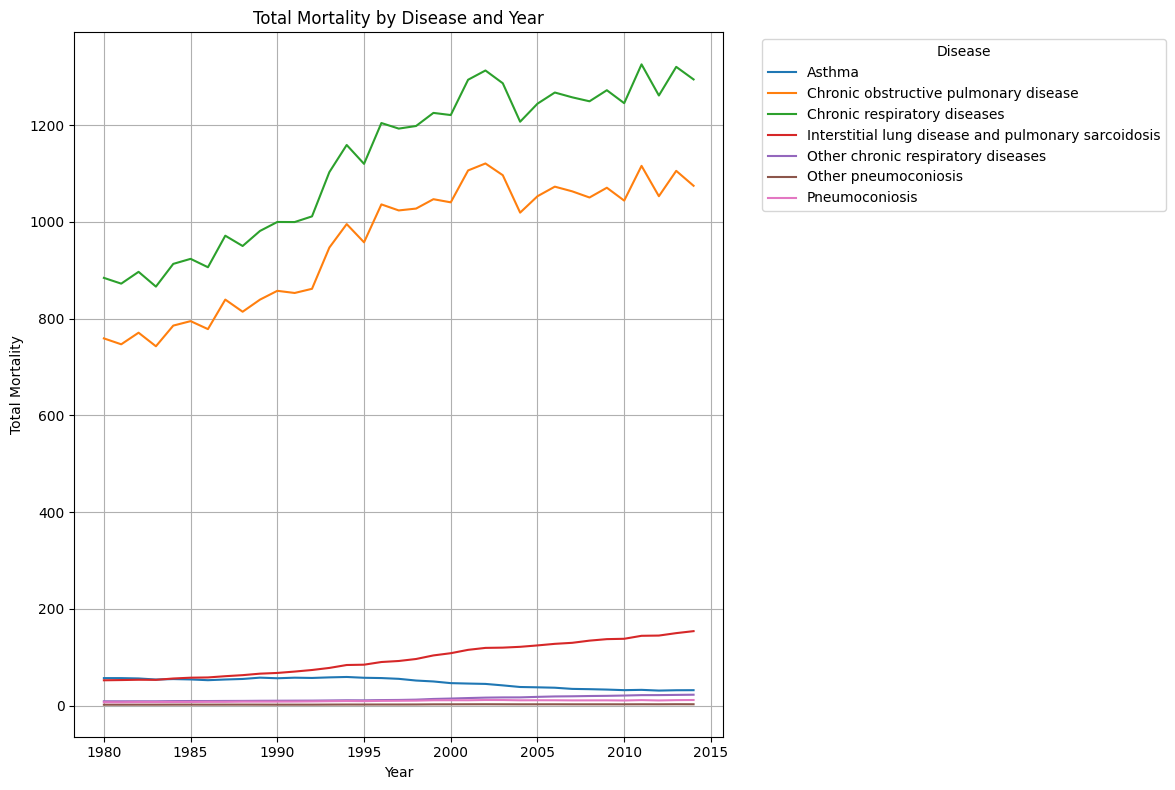

In [33]:
# Pivot the data for easier plotting
mortality_pivot = mortality_by_disease_and_year.pivot(index='year_id', columns='cause_name', values='mortality')

# Plot each disease's mortality trend
plt.figure(figsize=(12, 8))
for disease in mortality_pivot.columns:
    plt.plot(mortality_pivot.index, mortality_pivot[disease], label=disease)

# Add labels, legend, and title
plt.xlabel("Year")
plt.ylabel("Total Mortality")
plt.title("Total Mortality by Disease and Year")
plt.legend(title="Disease", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

I have also included the code on visualization the overall mortality trends as I thought it may be an interesting visualizaton. I did not use the overall mortality rates for further analysis in any parts of the whole project.

In [28]:
# Get the mortality estimates by year
overall_mortality_by_year = merged_data.groupby('year_id')['mortality'].sum().reset_index(name='total_mortality')
print(overall_mortality_by_year)
overall_mortality_by_year.to_csv('intermediary_files/overall_mortality_by_year.csv', index=False)

    year_id  total_mortality
0      1980      1770.496354
1      1981      1746.701757
2      1982      1795.569581
3      1983      1734.479396
4      1984      1828.568555
5      1985      1849.384519
6      1986      1814.652869
7      1987      1945.134100
8      1988      1902.530606
9      1989      1964.755918
10     1990      2001.784766
11     1991      2001.458738
12     1992      2024.918894
13     1993      2207.999414
14     1994      2320.441172
15     1995      2242.321149
16     1996      2411.255886
17     1997      2388.190957
18     1998      2399.002305
19     1999      2453.471307
20     2000      2444.625786
21     2001      2590.683557
22     2002      2629.021760
23     2003      2576.115782
24     2004      2417.050373
25     2005      2491.616344
26     2006      2537.857934
27     2007      2517.984148
28     2008      2501.495504
29     2009      2547.303659
30     2010      2493.699250
31     2011      2654.334267
32     2012      2525.472269
33     2013   

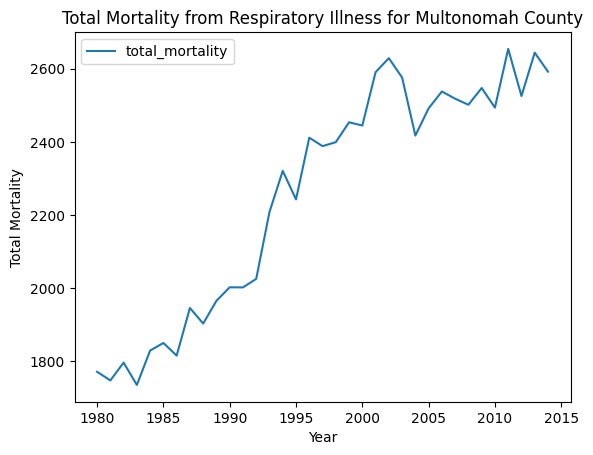

In [29]:
overall_mortality_by_year.plot(x = 'year_id', y = 'total_mortality')

plt.title("Total Mortality from Respiratory Illness for Multonomah County")
plt.xlabel("Year")
plt.ylabel("Total Mortality")

plt.show()